In [239]:
import numpy as np
import BiasVarv2 as bv
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys
sys.path.append("..")
from LeastSquare import LeastSquare as LS
from LinearRegression2 import LinearRegression2 as LR


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("Set2"))
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

def create_degree_x(raw_x, degree):
    new_x = []
    for w in raw_x:
        xx = []
        for i in range(degree+1):
            xx.append(w**i)
        new_x.append(xx)
    return np.array(new_x)
def mse(a, b):
    return np.round(np.mean((a-b)**2), 5)

# Weights 

In [286]:
weights = [0.0, 7.53168, 3.18338, -2.80976, -0.83359, 0.28874, 0.08547, -0.00862, -0.00249, 0.00329]

In [287]:
weights = np.array(weights)
y_degree = int(weights.shape[0]-1)
print(weights.shape)

(10,)


In [288]:
n_res = 10000
x = np.linspace(-3, 3, n_res)
index = np.arange(0, n_res)

In [289]:
xx = create_degree_x(x, y_degree)

In [290]:
y_noise = xx.dot(weights.T) + np.random.randn(n_res)
y = xx.dot(weights.T)

In [291]:
sample_size = 15
sample_index = np.random.choice(index, sample_size)

## Model Degree

In [309]:
model_degree = 2

In [310]:
x_sample = np.take(x, sample_index)
y_sample = np.take(y_noise, sample_index)

xx_sample = create_degree_x(x_sample, model_degree)

[-3, 3, -5, 10]

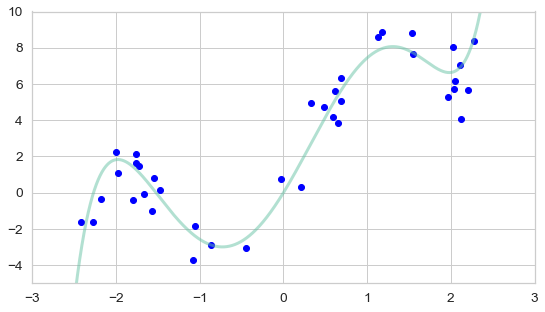

In [311]:
fig = plt.figure(figsize=(9, 5))
plt.plot(x, y, alpha=0.5)
plt.scatter(x_sample, y_sample, color='blue')
plt.axis([-3, 3, -5, 10])

In [312]:
ls = LS(xx_sample, y_sample)
model_w = ls.parameters

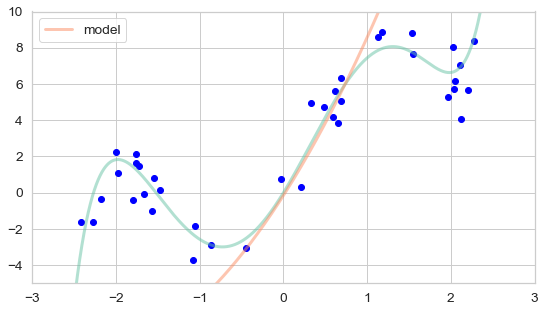

In [313]:
xx_predict = create_degree_x(x, model_degree)
predicted_y = model_w.dot(xx_predict.T)

fig = plt.figure(figsize=(9, 5))
plt.scatter(x_sample, y_sample, color='blue')
plt.plot(x, y, alpha=0.5)
plt.plot(x, predicted_y, alpha=0.5, label='model')
plt.axis([-3, 3, -5, 10])
plt.legend()

In [314]:
e_in = mse(y_sample, xx_sample.dot(model_w.T))

In [315]:
e_out =  mse(y, xx_predict.dot(model_w.T))

In [347]:
print(f'E in = {e_in}')
print(f'E out = {e_out}')

E in = []
E out = []


# plot learning curve

In [369]:
sample_list = np.arange(10, 55, 5)
model_degree = 10

sample=10	 E in=18.33684	 E out=125780.05466
sample=15	 E in=0.74481	 E out=13.27501
sample=20	 E in=0.60095	 E out=19929.13585
sample=25	 E in=1.1492	 E out=58.17212
sample=30	 E in=0.56584	 E out=13.9153
sample=35	 E in=0.69927	 E out=6.59508
sample=40	 E in=0.87361	 E out=9.18606
sample=45	 E in=0.63698	 E out=0.49596
sample=50	 E in=0.85325	 E out=2.76134


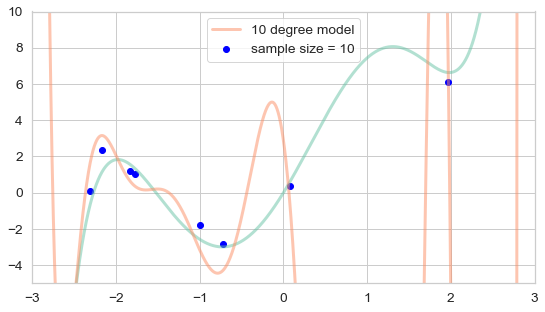

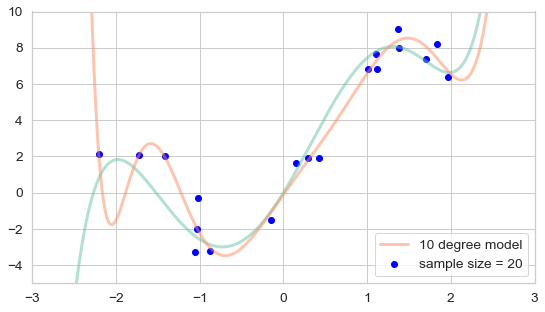

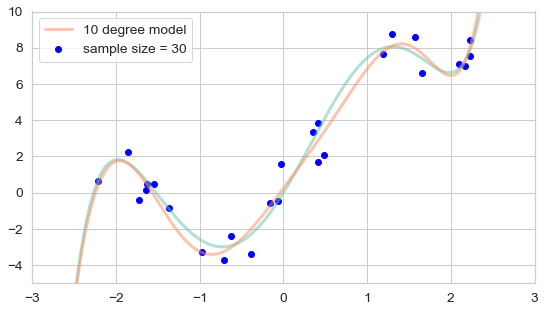

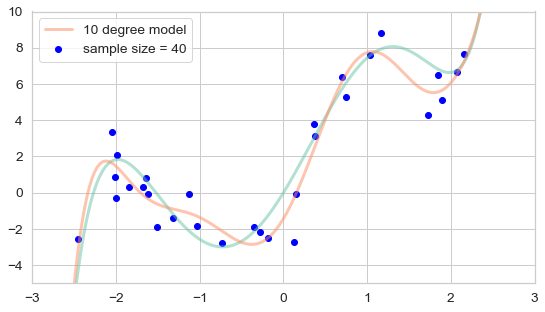

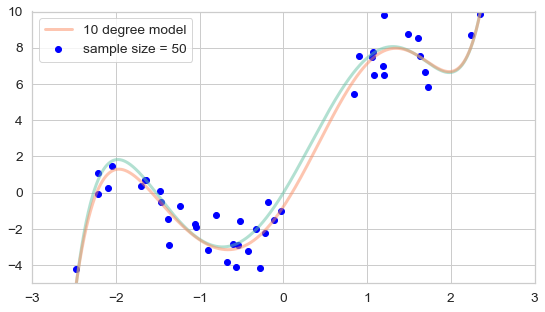

In [370]:
e_in = []
e_out = []

for s in sample_list:
    sample_index = np.random.choice(index, s)
    x_sample = np.take(x, sample_index)
    y_sample = np.take(y_noise, sample_index)
    # prepare x for polynomial model
    xx_sample = create_degree_x(x_sample, model_degree)
    xx = create_degree_x(x, model_degree)
    model = LS(xx_sample, y_sample)
    model_w = model.parameters
    
    predicted_y = model_w.dot(xx.T)
    predicted_sample = model_w.dot(xx_sample.T)
    
    # calculate E in and E out
    ein = mse(predicted_sample, y_sample)
    eout = mse(predicted_y, y)
    e_in.append(ein)
    e_out.append(eout)
    
    print(f'sample={s}\t E in={ein}\t E out={eout}')
    
    if s % 10 == 0:
        fig = plt.figure(figsize=(9, 5))
        plt.plot(x, y, alpha=0.5)
        plt.scatter(x_sample, y_sample, color='blue', label=f'sample size = {s}')
        plt.plot(x, predicted_y, alpha=0.5, label=f'{model_degree} degree model')
        plt.axis([-3, 3, -5, 10])
        plt.legend()

# plot learning curve

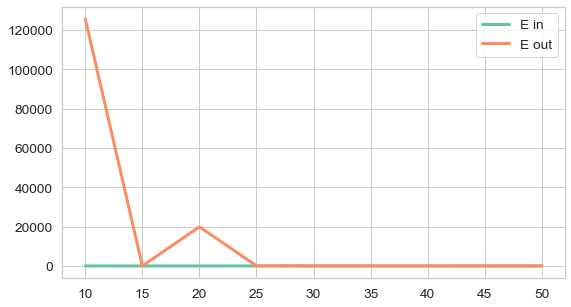

In [371]:
fig = plt.figure(figsize=(9, 5))
sns.lineplot(sample_list, e_in, label='E in')
sns.lineplot(sample_list, e_out, label='E out')